# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units="imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
response = requests.get(query_url + city).json()
print(response)

{'coord': {'lon': 32.65, 'lat': -13.63}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 57.27, 'feels_like': 51.67, 'temp_min': 57.27, 'temp_max': 57.27, 'pressure': 1016, 'humidity': 65, 'sea_level': 1016, 'grnd_level': 887}, 'visibility': 10000, 'wind': {'speed': 8.12, 'deg': 137}, 'clouds': {'all': 7}, 'dt': 1597447739, 'sys': {'country': 'ZM', 'sunrise': 1597464254, 'sunset': 1597506221}, 'timezone': 7200, 'id': 918702, 'name': 'Chipata', 'cod': 200}


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
city_name_log = []
city_id_log = []
unknown_cities = []
country_name_log=[]
lat = []
long=[]
temp=[]
humidity = []
cloudiness = []
wind_speed = []


# Build query URL
#query_url = url + "appid=" + weather_api_key + "&q=" + city

query_url = f"{url}appid={weather_api_key}&units={units}&q="

for city in cities:
    try: 
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        cloudiness.append(response['clouds']['all'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        city_name_log.append(response['name'])
        city_id_log.append(response['id'])
        country_name_log.append(response["sys"]["country"])
        print(f"City Name and Number  = {response['name']}, {response['id']}")
        #print(f"Cities found are:City Name = {city_name_log} City Number = {city_id_log}")

    except: 
        unknown_cities.append(city)        

City Name and Number  = Bluff, 2206939
City Name and Number  = Talnakh, 1490256
City Name and Number  = Severo-Kuril'sk, 2121385
City Name and Number  = Saskylakh, 2017155
City Name and Number  = East London, 1006984
City Name and Number  = Vila Franca do Campo, 3372472
City Name and Number  = Kamenka, 553766
City Name and Number  = New Norfolk, 2155415
City Name and Number  = Byron Bay, 2172880
City Name and Number  = Samarai, 2132606
City Name and Number  = Pangnirtung, 6096551
City Name and Number  = Carazinho, 3466978
City Name and Number  = Aklavik, 5882953
City Name and Number  = Mataura, 6201424
City Name and Number  = Ṭikāpur, 1282666
City Name and Number  = Sungai Penuh, 1625929
City Name and Number  = Caraúbas, 3402944
City Name and Number  = Bethel, 5282297
City Name and Number  = Saint George, 5546220
City Name and Number  = Broken Hill, 2173911
City Name and Number  = Atuona, 4020109
City Name and Number  = Hong Kong, 1819729
City Name and Number  = Zhigansk, 2012530
City 

City Name and Number  = Meulaboh, 1214488
City Name and Number  = Beloha, 1067565
City Name and Number  = Asău, 686090
City Name and Number  = Rio Branco, 3662574
City Name and Number  = Coari, 3664539
City Name and Number  = Saldanha, 3361934
City Name and Number  = Daşoguz, 601734
City Name and Number  = Vredendal, 3359736
City Name and Number  = Shimoda, 1852357
City Name and Number  = Auki, 2109701
City Name and Number  = Westlock, 6179138
City Name and Number  = Takoradze, 2294915
City Name and Number  = Sayyan, 70979
City Name and Number  = Casino, 2172153
City Name and Number  = Aswān, 359792
City Name and Number  = Salamiyah, 164947
City Name and Number  = Kaupanger, 7288345
City Name and Number  = Tamsweg, 2763929
City Name and Number  = Srednekolymsk, 2121025
City Name and Number  = Lærdal, 3148569
City Name and Number  = Pevek, 2122090
City Name and Number  = Pisco, 3932145
City Name and Number  = Ahipara, 2194098
City Name and Number  = Ilulissat, 3423146
City Name and Numb

City Name and Number  = Subachoque, 3667760
City Name and Number  = Zima, 2012484
City Name and Number  = Taoudenni, 2450173
City Name and Number  = Saint Anthony, 5044290
City Name and Number  = Gritsovskiy, 558497
City Name and Number  = Khazar, 828062
City Name and Number  = Ambilobe, 1082243
City Name and Number  = Abalak, 1512223
City Name and Number  = Daitari, 1273673
City Name and Number  = Goundam, 2456917
City Name and Number  = Jinji, 1805515
City Name and Number  = Tilichiki, 2120591
City Name and Number  = Kaohsiung City, 1673820
City Name and Number  = Luganville, 2136150
City Name and Number  = Puerto del Rosario, 2512186
City Name and Number  = Bundaberg, 2173323
City Name and Number  = Staryy Nadym, 1490918
City Name and Number  = Carutapera, 3402648
City Name and Number  = Cervo, 3125287
City Name and Number  = Cobija, 3919998
City Name and Number  = Garoowe, 58933
City Name and Number  = Mahébourg, 934322
City Name and Number  = Black Forest, 5414069
City Name and Nu

In [8]:
print(f"Error, some cities were not found:\n {unknown_cities}\n")

Error, some cities were not found:
 ['burica', 'sentyabrskiy', 'attawapiskat', 'taolanaro', 'tumannyy', 'barentsburg', 'illoqqortoormiut', 'lolua', 'vilaka', 'yanan', 'umzimvubu', 'karamea', 'grand river south east', 'malwan', 'amderma', 'kachikau', 'belushya guba', 'karauzyak', 'tokzar', 'tanjong karang', 'ituni', 'barbar', 'mys shmidta', 'meyungs', 'vaitupu', 'tsihombe', 'dujuma', 'kamenskoye', 'sumbawa', 'samusu', 'palabuhanratu', 'puerto cortes', 'sataua', 'marcona', 'galiwinku', 'rawannawi', 'chagda', 'haibowan', 'dien bien', 'nizhneyansk', 'rungata', 'guelengdeng', 'tabukiniberu', 'temaraia']



### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
d = {"City Name" : city_name_log, "Country": country_name_log, "City ID": city_id_log, "Latitude": lat, "Longitude": long, "Max Temperature": temp,
     "Humidity": humidity, "Cloudiness (%)": cloudiness, "Wind Speed": wind_speed}

df = pd.DataFrame(d)
df.head()



,City Name,Country,City ID,Latitude,Longitude,Max Temperature,Humidity,Cloudiness (%),Wind Speed
0,Bluff,NZ,2206939,-46.60,168.33,43.00,86,72,4.00
1,Talnakh,RU,1490256,69.49,88.40,60.80,72,2,15.66
2,Severo-Kuril'sk,RU,2121385,50.68,156.12,53.31,76,98,8.23
3,Saskylakh,RU,2017155,71.92,114.08,43.30,71,90,4.12
4,East London,ZA,1006984,-33.02,27.91,62.92,30,0,4.85


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
Humidity_check =df["Humidity"].max()
print(Humidity_check)

100


In [11]:
# Get the indices of cities that have humidity over 100%.
Humidity_df = df.loc[df["Humidity"]>100]
print(Humidity_df)
# Drop data for citie with humidity over 100% if any
#df.drop(df.index[df.Humidity > 100])


Empty DataFrame
Columns: [City Name, Country, City ID, Latitude, Longitude, Max Temperature, Humidity, Cloudiness (%), Wind Speed]
Index: []


In [12]:
df.head()
# clean_city_data = city_data_pd.drop(dirty_city_data, inplace=False)
# clean_city_data.head()

,City Name,Country,City ID,Latitude,Longitude,Max Temperature,Humidity,Cloudiness (%),Wind Speed
0,Bluff,NZ,2206939,-46.60,168.33,43.00,86,72,4.00
1,Talnakh,RU,1490256,69.49,88.40,60.80,72,2,15.66
2,Severo-Kuril'sk,RU,2121385,50.68,156.12,53.31,76,98,8.23
3,Saskylakh,RU,2017155,71.92,114.08,43.30,71,90,4.12
4,East London,ZA,1006984,-33.02,27.91,62.92,30,0,4.85


In [13]:
# Extract relevant fields from the data frame
lats = df["Latitude"]
max_temps = df["Max Temperature"]
humidity = df["Humidity"]
cloudiness = df["Cloudiness (%)"]
wind_speed = df["Wind Speed"]

# Export the City_Data into a csv
df.to_csv(output_data_file, index_label="City_ID")


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

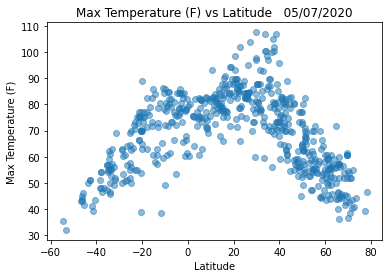

This plot shows the relationship between average temperature and latitude for the cities generated. 
Some coordinates were missing data on the weather website and they are listed above.
There is a visible linear relationship between Latitude and temperature


In [19]:

Temp_Lat= plt.scatter(lats, max_temps,  alpha=0.5)
plt.title('Max Temperature (F) vs Latitude   05/07/2020')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.show()
print(f"This plot shows the relationship between average temperature and latitude for the cities generated. \nSome coordinates were missing data on the weather website and they are listed above.")
print(f"There is a visible linear relationship between Latitude and temperature")

#fig = Temp_Lat.get_figure()
#fig.savefig("../output_data/Fig1.png")

## Latitude vs. Humidity Plot

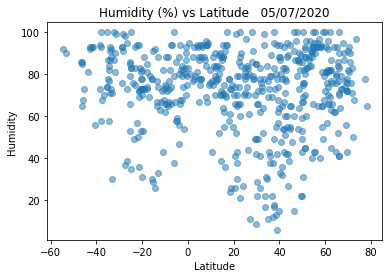

This plot shows the relationship between humidity and latitude for the cities generated. 
Some coordinates were missing data on the weather website and they are listed below.
The maximum humidity is 100% and no city recorded a humidity greater than 100%


In [21]:
Hum_Lat=plt.scatter(lats, humidity,  alpha=0.5)
plt.title('Humidity (%) vs Latitude   05/07/2020')
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.show()
print(f"This plot shows the relationship between humidity and latitude for the cities generated. \nSome coordinates were missing data on the weather website and they are listed below.")
print(f"The maximum humidity is 100% and no city recorded a humidity greater than 100%")


#fig = Hum_Lat.get_figure()
#fig.savefig("../output_data/Hum_Lat.png")

## Latitude vs. Cloudiness Plot

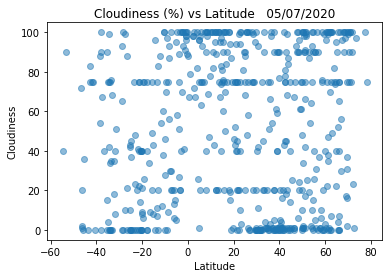

This plot shows the relationship between cloudiness and latitude for the cities generated. 
Some cities were missing data on the weather website and they are listed below
There is no evident relationship between Cloudiness and latitude.


In [22]:
Cloud_Lat = plt.scatter(lats, cloudiness,  alpha=0.5)
plt.title('Cloudiness (%) vs Latitude   05/07/2020')
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.show()
print(f"This plot shows the relationship between cloudiness and latitude for the cities generated. \nSome cities were missing data on the weather website and they are listed below")
print(f"There is no evident relationship between Cloudiness and latitude.")

#fig = Cloud_Lat.get_figure()
#fig.savefig("../output_data/Cloud_Lat.png")

## Latitude vs. Wind Speed Plot

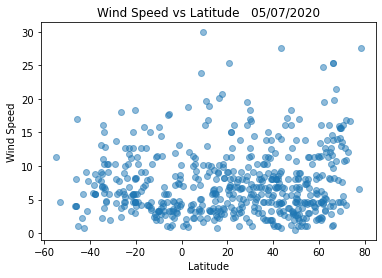

This plot shows the relationship between wind speed and latitude for the cities generated. 
 some cities were missing data on the weather website and they are listed below


In [23]:
Wind_Lat = plt.scatter(lats, wind_speed,  alpha=0.5)
plt.title('Wind Speed vs Latitude   05/07/2020')
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.show()
print(f"This plot shows the relationship between wind speed and latitude for the cities generated. \n some cities were missing data on the weather website and they are listed below")

#fig = Wind_Lat.get_figure()
#fig.savefig("../output_data/Wind_Lat.png")


## Linear Regression

In [25]:
# Create Northern and Southern Hemisphere DataFrames
df_North = df.loc[df["Latitude"]>0]
df_South = df.loc[df["Latitude"]<0]

In [26]:
# OPTIONAL: Create a function to create Linear Regression plots
Regression_Data_Y=[df_South['Max Temperature'], df_North['Max Temperature'], df_South["Humidity"],
                   df_North["Humidity"], df_South["Cloudiness (%)"], df_North["Cloudiness (%)"], 
                   df_South["Wind Speed"], df_North["Wind Speed"]]

Regression_Data_X = [df_South['Latitude'], df_North['Latitude'], df_South['Latitude'], df_North['Latitude'],
df_South['Latitude'],df_North['Latitude'], df_South['Latitude'], df_North['Latitude']]

Regression_Data_Labels = ["Max Temperature South", "Max Temperature North", "Humidity South", "Humidity North",
                          "Cloudiness (%) South","Cloudiness (%) North", "Wind Speed South", "Wind Speed North"]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Plot for the linear regression of Max Temperature South and latitude.
The r-squared for Max Temperature South is: 0.5798466170998344


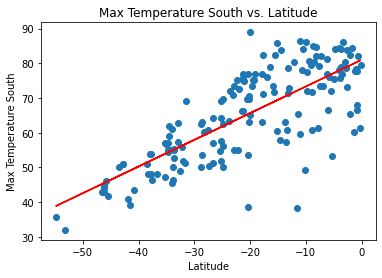

Plot for the linear regression of Max Temperature North and latitude.
The r-squared for Max Temperature North is: 0.5059607009622165


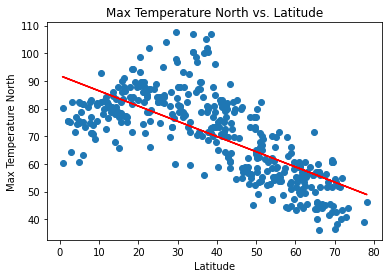

Plot for the linear regression of Humidity South and latitude.
The r-squared for Humidity South is: 0.033739712477267765


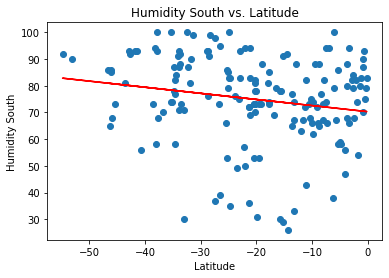

Plot for the linear regression of Humidity North and latitude.
The r-squared for Humidity North is: 0.00021235049801077575


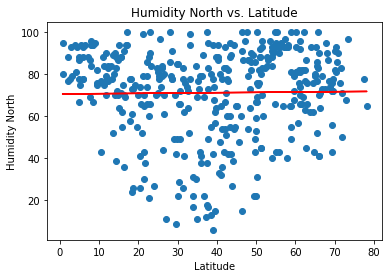

Plot for the linear regression of Cloudiness (%) South and latitude.
The r-squared for Cloudiness (%) South is: 0.04945396268638547


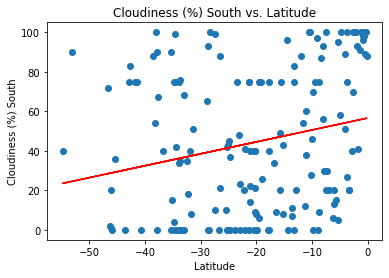

Plot for the linear regression of Cloudiness (%) North and latitude.
The r-squared for Cloudiness (%) North is: 0.013566661842641057


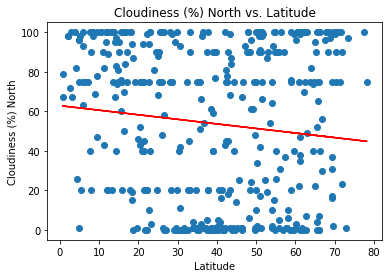

Plot for the linear regression of Wind Speed South and latitude.
The r-squared for Wind Speed South is: 0.013433063842054359


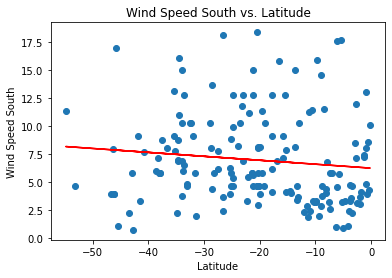

Plot for the linear regression of Wind Speed North and latitude.
The r-squared for Wind Speed North is: 0.012063431625874553


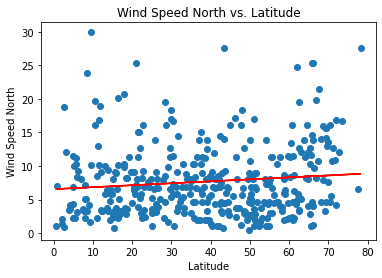

In [28]:
#Function to Calculate the linear regressions and produce plots for them
for i in range(8):

    x_values = Regression_Data_X[i]
    y_values = Regression_Data_Y[i]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    Data = plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.title((Regression_Data_Labels[i]) + ' vs. Latitude')

    #plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    plt.ylabel(Regression_Data_Labels[i])
    plt.xlabel('Latitude')

    print(f"Plot for the linear regression of {Regression_Data_Labels[i]} and latitude.")
    print(f"The r-squared for {Regression_Data_Labels[i]} is: {rvalue**2}")
    plt.show()

    #fig = Data.get_figure()
    #filename = (f"../output_data/linear regression of {Regression_Data_Labels[i]} vs Latitude.png")
    #fig.savefig(filename)
    #plt.show()
    #print(f"\n")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [2]:
for i in range(8):

    x_values = Regression_Data_X[i]
    y_values = Regression_Data_Y[i]
    y_values = Regression_Data
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    Data = plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.title((Regression_Data_Labels[i]) + ' vs. Latitude')

    #plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    plt.ylabel(Regression_Data_Labels[i])
    plt.xlabel('Latitude')

    print(f"Plot for the linear regression of {Regression_Data_Labels[i]} and latitude.")
    print(f"The r-squared for {Regression_Data_Labels[i]} is: {rvalue**2}")
    plt.show()

NameError: name 'Regression_Data' is not defined

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression